In [1]:
import pandas as pd
import numpy as np

#### GDP per country 1960 - 2010

In [2]:
gdp1 = pd.read_csv("datasets/gdp.csv")
gdp1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN,NaN


#### GDP per country per year, begin 1800's - 2010

In [3]:
gdp = pd.read_csv("datasets/gdp2.csv")

In [4]:
#EXPLORE IF YOU WISH
# gdp.loc[gdp['Entity'] == 'France']
gdp.head()
# gdp.tail()
# gdp.shape

,Entity,Code,Year,GDP per capita (Bolt and van Zanden (2015)) (international dollars (in 1990 prices))
0,Afghanistan,AFG,1950,645.0
1,Afghanistan,AFG,1951,653.0
2,Afghanistan,AFG,1952,664.0
3,Afghanistan,AFG,1953,692.0
4,Afghanistan,AFG,1954,694.0


#### Population per country per year since 1960

In [254]:
population = pd.read_csv("datasets/population.csv")

### Get the country codes to link dfs

In [255]:
iocCodes = pd.read_csv("datasets/iocCodes.csv")
isoCodes = pd.read_csv("datasets/isoCodes.csv")
iocCodes.columns = ['country','NOC','alpha-2']
countryCodes = pd.merge(isoCodes, iocCodes, on=['alpha-2'])
countryCodes = countryCodes[['country', 'NOC', 'alpha-2']]
# countryCodes[['country','NOC']]
countryCodes.head()

,country,NOC,alpha-2
0,Afghanistan,AFG,AF
1,Albania,ALB,AL
2,Algeria,ALG,DZ
3,American Samoa*,ASA,AS
4,Andorra,AND,AD


In [256]:
population = pd.merge(population, countryCodes, left_on='Country Name', right_on='country')

In [291]:
meds2008 = medalsPerCountryPerYear.loc[medalsPerCountryPerYear['Edition']==2008][['NOC','number_medals']]
# meds2008
# medalsPerCountryPerYear.iloc[0][['Edition']] == 2008

In [293]:

# population[['country','NOC']]
# population[['country','Country Code','2008']]
# population.head()

pop2008 = population[['country', '2008', 'NOC']]
# population.columns
# pop2008.head()
pop2008.columns=['country', 'pop2018', 'NOC']
popMeds2008 = pd.merge(pop2008, meds2008, on=['NOC'])
popMeds2008.columns = ['country','population','NOC','medals']

In [303]:
europe = ['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus',
          'Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus',
          'Czechia','Czech Republic','Denmark','Estonia','Finland','France',
          'Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy',
          'Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta',
          'Moldova','Monaco','Montenegro','Netherlands','North Macedonia',
          'Macedonia','Norway','Poland','Portugal','Romania','Russia',
          'Russian Federation','San Marino','Serbia','Slovakia','Slovak Republic',
          'Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine',
          'United Kingdom','UK','Vatican City']

europeDF = pd.DataFrame(europe)
europeDF.columns = ['country']
popMeds2008 = pd.merge(popMeds2008, europeDF, on = 'country')

### make graph of population against medals for 2008

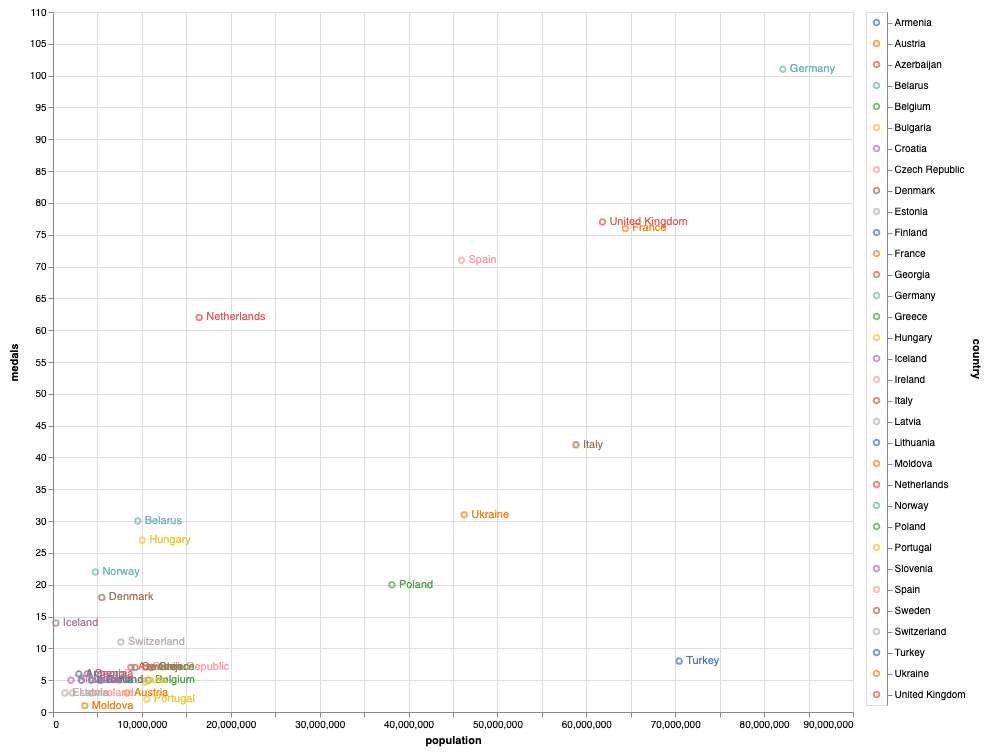

In [309]:
import altair as alt
import pandas as pd

selection = alt.selection_multi( fields=['country'])
color = alt.condition(selection,
                      alt.Color('country:N', legend=None),
                      alt.value('lightgray'))

points = alt.Chart(popMeds2008).mark_point().encode(
    x='population:Q',
    y='medals:Q',
    color=color
)

text = points.mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    text='country'
).properties(
    width=800, height=700
)

legend = alt.Chart(popMeds2008).mark_point().encode(
    y=alt.Y('country:N', axis=alt.Axis(orient='right')),
    color=color
).add_selection(
    selection_multi
)


chart = points + text | legend

chart

In [310]:
chart.save("outputs/charts/pop.html")

#### Medals at olympic games  1896-2008

In [7]:
medals = pd.read_excel("datasets/medals.xlsx")

In [8]:
# THERE SEEMS TO BE MANY MORE MEDALS PER COUNTRY THAN WHAT I FIND ONLINE FOR SOME REASON
#https://en.wikipedia.org/wiki/2008_Summer_Olympics_medal_table
# medals.loc[(medals['Edition'] == 2008) &
#            (medals['NOC'] == 'USA') & 
#            (medals['City'] == 'Beijing')].head(300)


In [9]:
#EXPLORE IF YOU WISH
# medals.head(100)
# medals.loc[medals['NOC'] == 'URS'] #check out URSS for fun
# medals.tail()
# medals.shape

medals.loc[medals['Event_gender'] == 'X'].head()

# RUN THE NEXT LINE TO NOTICE THAT FIRST EDITION HAD ONLY MEN EVENTS
# medals.loc[medals['Edition'] == 1896]


,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
348,Paris,1900,Equestrian,Jumping,"VAN DE POELE, Georges",BEL,Men,high jump,X,Bronze
349,Paris,1900,Equestrian,Jumping,"GARDERES, Dominique Maximien",FRA,Men,high jump,X,Gold
350,Paris,1900,Equestrian,Jumping,"TRISSINO, Gian Giorgio",ITA,Men,high jump,X,Gold
351,Paris,1900,Equestrian,Jumping,"DE CHAMPSAVIN, Louis",FRA,Men,individual,X,Bronze
352,Paris,1900,Equestrian,Jumping,"HAEGEMAN, Aimé",BEL,Men,individual,X,Gold


### Let's look into genders at the Olympic games

#### What are the number of events per gender

In [10]:
eventsPerGender = medals.groupby(['Edition','Event','Event_gender']).size().reset_index(name= 'number_events')
eventsPerGender = eventsPerGender.groupby(['Edition','Event_gender']).count().reset_index()[['Edition','Event_gender','number_events']]
# eventsPerGender['number_events'] = eventsPerGender['number_events']/3 #because there are ususally 3 medals per events
eventsPerGender.tail()



,Edition,Event_gender,number_events
70,2004,W,120
71,2004,X,6
72,2008,M,154
73,2008,W,121
74,2008,X,6


#### stacked bars of number of events per gender

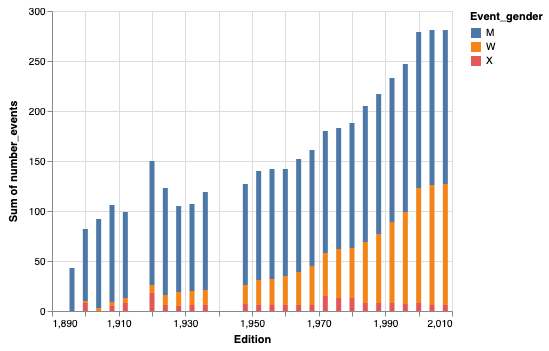

In [20]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(eventsPerGender).mark_bar().encode(
    x='Edition',
    y='sum(number_events)',
    color='Event_gender'
)

if we don't sum the number of events it becomes easier to compare but less intuitive i find

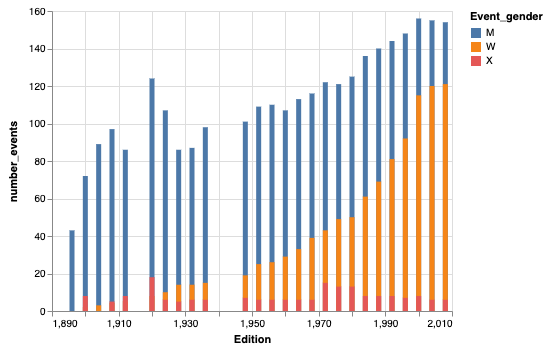

In [21]:
alt.Chart(eventsPerGender).mark_bar().encode(
    x='Edition',
    y='number_events',
    color='Event_gender'
)

#### Are the mixed gender sports balanced in the number of medals per gender?

In [22]:
medalsPerGenderMixedEvents = medals.loc[medals['Event_gender'] == 'X'].groupby(['Gender']).size().reset_index(name = 'number_medals')
medalsPerGenderMixedEvents

,Gender,number_medals
0,Men,1653
1,Women,218


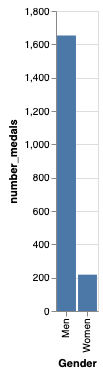

In [23]:
alt.Chart(medalsPerGenderMixedEvents).mark_bar().encode(
    x='Gender',
    y='number_medals'
)

#### Let's look at the countries with most medals

In [154]:
medals_per_country = medals.groupby('NOC').size().reset_index(name= 'total')
medals_per_country.head()

,NOC,total
0,AFG,1
1,AHO,1
2,ALG,14
3,ANZ,29
4,ARG,239


In [197]:
# isoCodes.loc[isoCodes['NOC'] == 'BEL']
# isoCodes.iloc[150:200]
iocCodes = pd.read_csv("datasets/iocCodes.csv")
iocCodes.head()
iocCodes= iocCodes[['Country','NOC']]
iocCodes.columns = ['country','NOC']

In [207]:

medalsPerCountryPerType = medals.groupby(['NOC','Medal'], as_index=False).size()
medalsPerCountryPerType = medalsPerCountryPerType.unstack()#.transpose()
# medalsPerCountryPerType.head()
# medalsPerCountryPerType = pd.merge(medals_per_country, medalsPerCountryPerType, on=['NOC']).transpose()
# medalsPerCountryPerType['total'] = medalsPerCountryPerType.groupby(['NOC']).sum()

medalsPerCountryPerType = medalsPerCountryPerType.reset_index().fillna(0)
medalsPerCountryPerType = pd.merge(medals_per_country, medalsPerCountryPerType, on=['NOC'])



medalsPerCountryPerType = pd.merge(medalsPerCountryPerType, iocCodes, on=['NOC'])
medalsPerCountryPerType = medalsPerCountryPerType.drop(['NOC'], axis = 1)
# medalsPerCountryPerType = medalsPerCountryPerType.set_index('country').transpose()
medalsPerCountryPerType.head()




# medalsPerCountryPerType['total'] = medalsPerCountryPerType['Gold'] + medalsPerCountryPerType['Silver'] + medalsPerCountryPerType['Bronze']
# medalsPerCountryPerType = medalsPerCountryPerType.transpose()
medalsPerCountryPerType.to_json("outputs/jsons/medalsPerCountryPerType.json", orient = 'records')
# medalsPerCountryPerType.loc[medalsPerCountryPerType['NOC'] == 'USA']

In [24]:

# medals_per_country.sort_values(by=['number_medals'], ascending = False)
countriesWithMostMedals = medals_per_country.sort_values(by=['number_medals'], ascending = False).iloc[0:9]
countriesWithMostMedals

,NOC,number_medals
130,USA,4335
128,URS,2049
43,GBR,1594
41,FRA,1314
62,ITA,1228
46,GER,1211
6,AUS,1075
52,HUN,1053
113,SWE,1021


### Export medals_per_country to JSON

In [55]:
medals_per_country.to_json("outputs/jsons/medalsPerCountry.json")

#### Simple bar chart of 10 countries with most medals

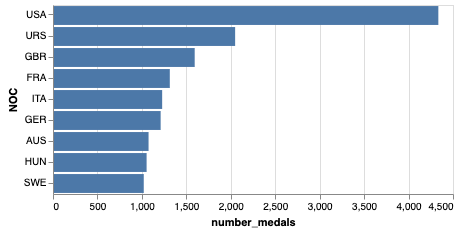

In [25]:
import altair as alt
alt.renderers.enable('notebook')

alt.Chart(countriesWithMostMedals).mark_bar().encode(
    x='number_medals:Q',
    y=alt.Y(
        'NOC:N',
        sort=alt.EncodingSortField(
            field="number_medals",  # The field to use for the sort
            op= "values",  # The operation to run on the field prior to sorting
            order="ascending"  # The order to sort in
        )
    )
)


#### DF containing the isocodes for countries

In [26]:
isoCodes = pd.read_csv("datasets/isoCodes.csv")

#### We select the iso code alpha-3 which is the one use in the olympics database

In [27]:
isoCodes = pd.read_csv("datasets/isoCodes.csv")
isoCodes= isoCodes[['name','alpha-3']]
isoCodes.head()

,name,alpha-3
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM


### Connect GDP with medals

In [28]:
gdp1.head()
gdpDF = gdp1.drop(['Country Name','Indicator Code','Indicator Name','Unnamed: 63'],axis = 1)
gdpDF.head()

,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.581564e+09,2.649721e+09,2.691620e+09,2.646927e+09,2.700559e+09,NaN
1,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.243909e+10,1.585657e+10,1.780429e+10,1.990732e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.904636e+10,1.954398e+10,NaN
2,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.030716e+10,8.379950e+10,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,NaN
3,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192696e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322825e+10,1.138693e+10,1.188368e+10,1.303854e+10,NaN
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN


#### I melt and sort the df so that the years become rows. I also merge it with the dataset of the medals just to remove the GDP values of countries that were no competing 

In [33]:
medalsPerCountryPerYear = medals.groupby(['NOC','Edition']).size().reset_index(name= 'number_medals')
medalsPerCountryPerYear.sort_values('NOC').head()


,NOC,Edition,number_medals
0,AFG,2008,1
1,AHO,1988,1
2,ALG,1984,2
3,ALG,1992,2
4,ALG,1996,3


In [53]:
medals_per_country

,NOC,number_medals
0,AFG,1
1,AHO,1
2,ALG,14
3,ANZ,29
4,ARG,239
5,ARM,9
6,AUS,1075
7,AUT,146
8,AZE,16
9,BAH,23


In [34]:
gdpMelted = pd.melt(gdpDF, id_vars=['Country Code'], var_name = 'Edition', value_name = 'GDP')
gdpMelted.columns = ['NOC','Edition','GDP']
gdpMelted['Edition'] = np.int64(gdpMelted['Edition'])
print(gdpMelted.shape)
gdpMelted = pd.merge(medalsPerCountryPerYear,
                    gdpMelted, 
                    on=['NOC','Edition'])
print(gdpMelted.shape)
gdpMelted = gdpMelted[['NOC','Edition','GDP']]

gdpPerCountryPerYear = gdpMelted.sort_values(['NOC','Edition']).reset_index().drop('index', axis = 1)

gdpPerCountryPerYear.head()


(15576, 3)
(498, 4)


,NOC,Edition,GDP
0,AFG,2008,1.010923e+10
1,ARG,1960,NaN
2,ARG,1964,2.560525e+10
3,ARG,1968,2.643686e+10
4,ARG,1972,3.473300e+10


In [35]:
gdpPerCountryPerYear.shape

(498, 3)

In [36]:
# type(gdpPerCountryPerYear['Edition'].iloc[0])

In [40]:
medalsAndGdpPerCountryPerYear = pd.merge(gdpPerCountryPerYear,
                                         medalsPerCountryPerYear, 
                                        on=['Edition','NOC'])

#### Now i'll get the number of medals per country per year

In [41]:
medals.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [42]:
medalsAndGdpPerCountryPerYear.shape

(498, 4)

In [43]:
type(medalsPerCountryPerYear['Edition'].iloc[0])

numpy.int64

In [44]:
medalsAndGdpPerCountryPerYear.dropna(axis = 0)
type(medalsAndGdpPerCountryPerYear['GDP'].iloc[1])
medalsAndGdpPerCountryPerYear=medalsAndGdpPerCountryPerYear.dropna()
medalsAndGdpPerCountryPerYear.head()

,NOC,Edition,GDP,number_medals
0,AFG,2008,1.010923e+10,1
2,ARG,1964,2.560525e+10,1
3,ARG,1968,2.643686e+10,2
4,ARG,1972,3.473300e+10,1
5,ARG,1988,1.262068e+11,13


In [45]:
medalsAndGdpPerCountryPerYear.sort_values(by='number_medals', ascending=False).head()

,NOC,Edition,GDP,number_medals
480,USA,1984,4.040693e+12,333
486,USA,2008,1.471858e+13,315
485,USA,2004,1.227493e+13,264
483,USA,1996,8.100201e+12,260
484,USA,2000,1.028478e+13,248


In [46]:
medalsAndGdpPerCountryPerYear.shape

(455, 4)

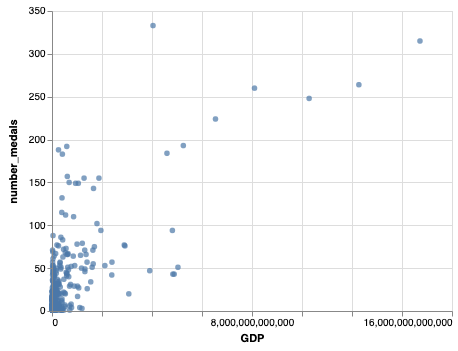

In [47]:


alt.Chart(medalsAndGdpPerCountryPerYear).mark_circle().encode(
    x='GDP',
    y='number_medals',

)

#### I am not really happy with the above graph because the GDP of each country changes over time, so I would like to make it relative. For each year, find the highest GDP and then express all of them as a percentage of this one.

In [48]:
#GET THE MAX GDP PER YEAR
maxGdp = gdpPerCountryPerYear.groupby('Edition').agg({'GDP':max}).reset_index()
maxGdp.columns = ['Edition', 'max_gdp']

#ADD THE MAX GDP TO THE GDP PER COUNTRY PER YEAR DF
relGdp = pd.merge(gdpPerCountryPerYear,
                 maxGdp, 
                 on='Edition')
relGdp = relGdp.dropna()
relGdp['relative_gdp'] = relGdp['GDP']/relGdp['max_gdp']
relGdp.sort_values(by='relative_gdp', ascending = False).head()


,NOC,Edition,GDP,max_gdp,relative_gdp
87,USA,1960,5.433000e+11,5.433000e+11,1.0
145,USA,1968,9.425000e+11,9.425000e+11,1.0
496,USA,1984,4.040693e+12,4.040693e+12,1.0
179,USA,1972,1.282449e+12,1.282449e+12,1.0
213,USA,1988,5.252629e+12,5.252629e+12,1.0


In [49]:
relGdp.shape

(455, 5)

In [50]:
# medals.loc[medals['NOC'] == 'WLD']

In [51]:
relGdpAndMedalsPerCountryPerYear = pd.merge(relGdp,
                                            medalsPerCountryPerYear, 
                                           on=['NOC','Edition'])
relGdpAndMedalsPerCountryPerYear.head()

,NOC,Edition,GDP,max_gdp,relative_gdp,number_medals
0,AFG,2008,1.010923e+10,1.471858e+13,0.000687,1
1,ARG,2008,3.615580e+11,1.471858e+13,0.024565,51
2,ARM,2008,1.166204e+10,1.471858e+13,0.000792,6
3,AUS,2008,1.052585e+12,1.471858e+13,0.071514,149
4,AUT,2008,4.302943e+11,1.471858e+13,0.029235,3


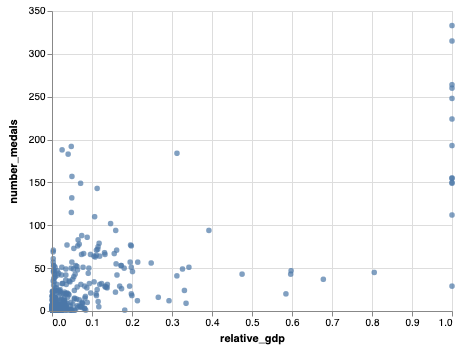

In [52]:

alt.Chart(relGdpAndMedalsPerCountryPerYear).mark_circle().encode(
    x='relative_gdp',
    y='number_medals',

)

#### ^ mmmm i'm not sure that this makes much sense either. We should probably use the mean GDP per year instead because USA has a too high GDP each year. Also it would be interesting to use the GDP per Capita.